In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility
k_true = 2  # True value of k
t = np.linspace(0, 1, 100)  # 100 points in the interval [0, 1]
y_true = np.exp(-k_true * t)  # True values without noise
noise = np.random.normal(0, 0.05, size=t.shape)  # Gaussian noise
y_observed = y_true + noise  # Noisy observations

In [3]:
# Step 2: Define the negative log-likelihood function for MLE estimation of k
def neg_log_likelihood(k):
    y_model = np.exp(-k * t)  # Model prediction with current k
    residuals = y_observed - y_model
    # Log-Likelihood assuming variance is 1 (simplification):
    log_likelihood = -0.5 * np.sum(residuals ** 2)
    return -log_likelihood  # Return negative for minimization

In [4]:
# Step 3: Use numerical optimization to maximize log-likelihood (minimize negative log-likelihood)
initial_guess = 1.0  # Initial guess for k
result = minimize(neg_log_likelihood, initial_guess, method='Nelder-Mead')
k_estimated = result.x[0]

In [5]:
print(f"True k: {k_true}")
print(f"Estimated k: {k_estimated}")
print(f"Maximized Log-Likelihood Value: {-result.fun}")

True k: 2
Estimated k: 2.040136718750002
Maximized Log-Likelihood Value: -0.10156501919401117


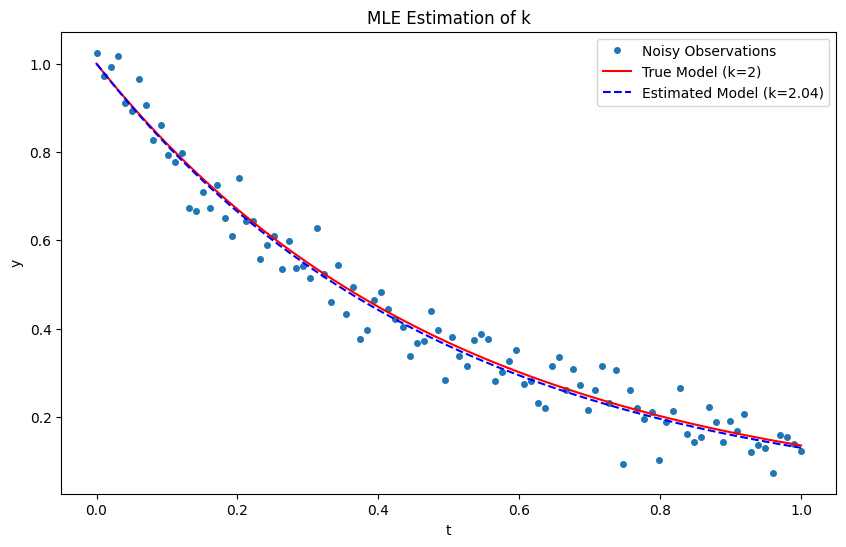

In [6]:
# Step 4: Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, y_observed, 'o', label="Noisy Observations", markersize=4)
plt.plot(t, y_true, 'r-', label="True Model (k=2)")
plt.plot(t, np.exp(-k_estimated * t), 'b--', label=f"Estimated Model (k={k_estimated:.2f})")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.title("MLE Estimation of k")
plt.show()